In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
image_size = [224,224]

In [5]:
train_path = "Dataset\Train"
valid_path = "Dataset\Test"

In [6]:
model = Sequential()

In [7]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)            

In [8]:
model.compile(optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

testgen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = datagen.flow_from_directory(directory = train_path,
    target_size=(224, 224),
    batch_size = 20,class_mode = 'categorical' )

Found 416 images belonging to 2 classes.


In [12]:
test_set = datagen.flow_from_directory(directory = valid_path,
    target_size=(224, 224),
    batch_size = 20,class_mode = 'categorical' )

Found 134 images belonging to 2 classes.


In [17]:
r =model.fit( training_set,
  validation_data=test_set,
  epochs=10)

Epoch 1/10
21/21 [==============================] - 22s 1s/step - loss: 0.4464 - accuracy: 0.7933 - val_loss: 0.9477 - val_accuracy: 0.4478
Epoch 2/10
21/21 [==============================] - 21s 1s/step - loss: 0.3847 - accuracy: 0.8101 - val_loss: 0.7138 - val_accuracy: 0.5448
Epoch 3/10
21/21 [==============================] - 21s 987ms/step - loss: 0.3816 - accuracy: 0.8510 - val_loss: 0.4908 - val_accuracy: 0.7910
Epoch 4/10
21/21 [==============================] - 21s 982ms/step - loss: 0.2465 - accuracy: 0.9038 - val_loss: 0.5250 - val_accuracy: 0.7015
Epoch 5/10
21/21 [==============================] - 20s 971ms/step - loss: 0.2898 - accuracy: 0.8846 - val_loss: 1.0980 - val_accuracy: 0.4925
Epoch 6/10
21/21 [==============================] - 21s 1s/step - loss: 0.2226 - accuracy: 0.9159 - val_loss: 0.4921 - val_accuracy: 0.7537
Epoch 7/10
21/21 [==============================] - 32s 2s/step - loss: 0.2084 - accuracy: 0.9351 - val_loss: 1.1733 - val_accuracy: 0.4925
Epoch 8/10


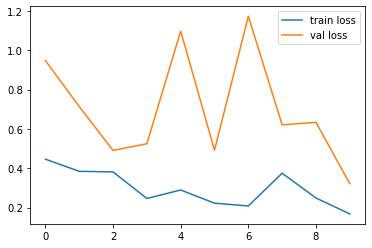

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history["loss"],label = "train loss")
plt.plot(r.history["val_loss"],label = "val loss")
plt.legend()
plt.show()
plt.savefig("loss_val_loss")

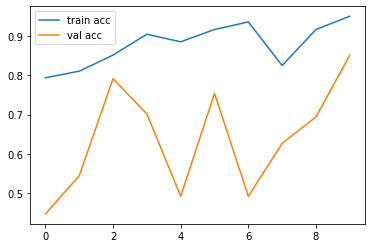

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

In [21]:
model.save("cnn_model_sandy.h5")

In [31]:
y_pred = model.predict(test_set)

In [32]:
import numpy as np

In [33]:
y_predd = np.argmax(y_pred, axis = 1)

In [34]:
y_predd

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [42]:
img = image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [43]:
x = image.img_to_array(img)

In [44]:
x.shape

(224, 224, 3)

In [45]:
x =x/255

In [46]:
x  = np.expand_dims(x, axis = 0)

In [47]:
x.shape

(1, 224, 224, 3)

In [48]:
img_data = preprocess_input(x)

In [51]:
a=np.argmax(model.predict(img_data), axis=1)

In [52]:
a

array([0], dtype=int64)

In [53]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
